# Basic Operations on Images

## Goal

Learn to:

* Access pixel values and modify them
* Access image properties
* Setting Region of Image (ROI)
* Splitting and Merging images

Almost all the operations in this section is mainly related to **Numpy** rather than OpenCV. A good knowledge of **Numpy** is required to write better optimized code with OpenCV.

(Examples will be shown in Python terminal since most of them are just single line codes)


## Accessing and Modifying pixel values

Let’s load a color image first:

In [1]:
import cv2
import numpy as np

img = cv2.imread('data/messi5.jpg')

You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [2]:
px = img[100,100]
print(px)
px

[156 166 200]


array([156, 166, 200], dtype=uint8)

In [3]:
# accessing only blue pixel
blue = img[100,100,0]
print(blue)
blue

156


156

You can modify the pixel values the same way.

In [4]:
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


> ## Warning
>
> Numpy is a optimized library *for fast array calculations*. So simply accessing each and every pixel values and modifying it will be very slow and it is discouraged.

> ## Note
>
> Above mentioned method is normally used for selecting a region of array, say first 5 rows and last 3 columns like that. For individual pixel access, **Numpy** array methods, `array.item()` and `array.itemset()` is considered to be better. But it always returns a scalar. So if you want to access all B,G,R values, you need to call `array.item()` separately for all.

Better pixel accessing and editing method :

In [5]:
# accessing RED value
img.item(10,10,2)

59

In [6]:
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

## Accessing Image Properties

Image properties include 
* number of rows, columns and channels, 
* type of image data, 
* number of pixels 
* etc.

Shape of image is accessed by `img.shape`. 
* It returns a tuple of number of rows, columns and channels (if image is color):

In [7]:
print(img.shape)

(342, 548, 3)


> ## Note
>
> If image is grayscale, tuple returned contains only number of rows and columns. So it is a good method to check if loaded image is grayscale or color image.

Total number of pixels is accessed by `img.size`:

In [8]:
print(img.size)

562248


Image datatype is obtained by `img.dtype`:

In [9]:
print(img.dtype)

uint8


> ## Note
>
>img.dtype is very important while debugging because a large number of errors in OpenCV-Python code is caused by invalid datatype.

## Image ROI

Sometimes, you will have to play with certain region of images. For eye detection in images, first perform face detection over the image until the face is found, then search within the face region for eyes. This approach improves accuracy (because eyes are always on faces :D ) and performance (because we search for a small area).

**ROI** is again obtained using **Numpy indexing**. 
Here I am selecting the ball and copying it to another region in the image:

In [10]:
cv2.imshow('original imgae',img) #expects true color

ball = img[280:340,330:390]
img[273:333,100:160] = ball

cv2.imshow('modified image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Splitting and Merging Image Channels

The B,G,R channels of an image can be split into their individual planes when needed. Then, the individual channels can be merged back together to form a BGR image again. This can be performed by:

In [11]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

Or

In [12]:
b = img[:,:,0]

In [13]:
cv2.imshow('blue channel img',b)
cv2.waitKey(0)
cv2.destroyAllWindows()

Suppose, you want to make all the red pixels to zero, you need not split like this and put it equal to zero. You can simply use Numpy indexing which is faster.

In [14]:
img[:,:,2]= 0

In [15]:
cv2.imshow('zero red channel img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

> ## Warning
>
> `cv2.split()` is a costly operation (in terms of time), so only use it if necessary. Numpy indexing is much more efficient and should be used if possible.

## Making Borders for Images (Padding)

If you want to create a border around the image, something like a photo frame, you can use `cv2.copyMakeBorder()` function. But it has **more applications for convolution operation**, zero padding etc. This function takes following arguments:

* src - input image
* top, bottom, left, right - border width in number of pixels in corresponding directions
* borderType - Flag defining what kind of border to be added. It can be following types:
    * **cv2.BORDER_CONSTANT** - Adds a constant colored border. The value should be given as next argument.
    * **cv2.BORDER_REFLECT** - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
    * **cv2.BORDER_REFLECT_101** or `cv2.BORDER_DEFAULT` - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
    * **cv2.BORDER_REPLICATE** - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
    * **cv2.BORDER_WRAP** - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg
* value - Color of border if border type is `cv2.BORDER_CONSTANT`

Below is a sample code demonstrating all these border types for better understanding:

See the result above. (Image is displayed with matplotlib. So RED and BLUE planes will be interchanged):


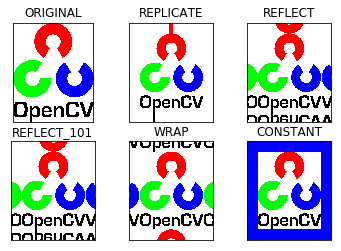

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('data/opencv-logo.png')

replicate = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_CONSTANT,value=BLUE)

img1 = img1[:,:,::-1]
replicate = replicate[:,:,::-1]
reflect = reflect[:,:,::-1]
reflect101 = reflect101[:,:,::-1]
wrap = wrap[:,:,::-1]
constant = constant[:,:,::-1]


print('See the result above. (Image is displayed with matplotlib. So RED and BLUE planes will be interchanged):')
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.xticks([]);plt.yticks([])
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.xticks([]);plt.yticks([])
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.xticks([]);plt.yticks([])
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.xticks([]);plt.yticks([])
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.xticks([]);plt.yticks([])
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.xticks([]);plt.yticks([])

plt.show()